<a href="https://colab.research.google.com/github/JoseGabriel-ITD/MachineLearning/blob/main/Unidad2/Arboles_Regresion_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 2

### Practica 2: **Árboles de Regresión**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________

**Regresión Lineal**:

- Ajusta una ecuación lineal (una recta o hiperplano) a los datos.

- Supone una relación lineal entre las variables.

- Fácil de interpretar, pero limitada si los datos tienen relaciones no lineales.


**Árboles de Regresión**:

- Divide los datos en regiones utilizando condiciones basadas en los valores de las variables.

- No requiere suposiciones de linealidad.

- Puede capturar relaciones no lineales y efectos de interacción entre variables.

- Puede sobreajustar si no se controla la profundidad


**Resumen**:

- La regresión lineal es más simple y adecuada si la relación es aproximadamente lineal.

- Los árboles de regresión son más flexibles pero menos interpretables.



## **1. Cargar datos y librerías**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("autos2.csv")

# Mostrar las primeras filas
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


## **2. Definir variables predictoras y variable objetivo**

In [3]:
X = df[['horsepower', 'engine-size', 'city-mpg', 'wheel-base', 'bore']]
y = df['price']


## **3. Dividir en conjunto de entrenamiento y prueba**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **4. Entrenar árbol de regresión**

In [5]:
tree_model = DecisionTreeRegressor(random_state=42, max_depth=4)
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

## **5. Evaluar el modelo**

In [6]:
y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Error cuadrático medio (MSE): {mse_tree:.2f}")
print(f"Coeficiente de determinación (R²): {r2_tree:.2f}")


Error cuadrático medio (MSE): 9188294.38
Coeficiente de determinación (R²): 0.92


In [11]:
import numpy as np
# Calcular el RMSE (mas facil de interpretar que el MSE)
rmse = np.sqrt(9188294.38)
print(rmse)  # Aproximadamente 3,031

3031.219949129393


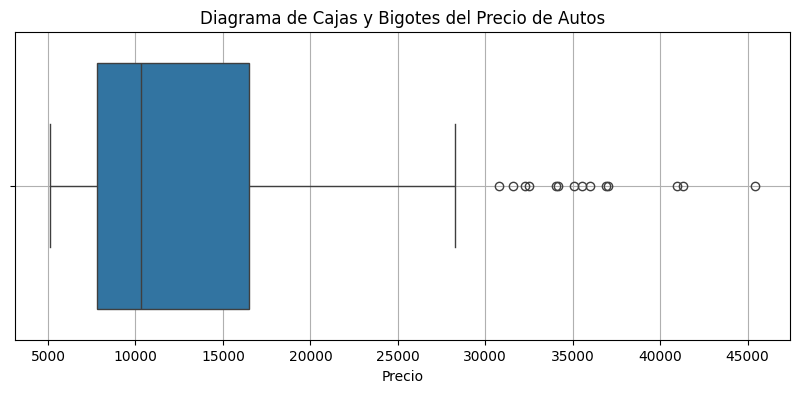

In [13]:
# Diagrama para visualizar el rango de precios e interpretar mejor los resultados
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["price"])

plt.title("Diagrama de Cajas y Bigotes del Precio de Autos")
plt.xlabel("Precio")
plt.grid(True)
plt.show()

### **Interpretación:**

#### **1. Error Cuadrático Medio (MSE)**

RMSE ≈ $3,030 comparado con los precios reales
* Para autos cuyo precio ronda 8,000 a 16,000 (la mayoría), un error promedio de 3,000 representa:
* * ≈ **18% a 38% de error relativo**, lo cual puede **considerarse moderado a alto** dependiendo del uso del modelo (comercial vs analítico).
* Para autos caros (> 30,000), este error representa menos del 10%, por lo tanto es más aceptable.

#### **2. Coeficiente de Determinación (R² = 0.92)**

El R² mide **qué proporción de la variación en la variable dependiente (`precio`) puede ser explicada por el modelo**.

* R² = **0.92** significa que **el 92% de la variabilidad en los precios** se puede explicar a partir de las variables predictoras que se usaron (`horsepower`, `engine-size`, etc.).
* Es un excelente resultado, ya que un **R² cercano a 1 indica que el modelo se ajusta muy bien a los datos**.
Aunque el RMSE pueda parecer alto para autos baratos, el modelo logra explicar el 92% de la varianza total. Eso indica que:
* El modelo captura muy bien las tendencias generales de cómo varían los precios en función de las variables.
* Aun así, puede que no sea tan preciso para los autos de gama baja/media, especialmente si hay pocos datos de esos rangos o si la relación entre variables es más compleja ahí.

## 6. Comparar precios reales vs predichos

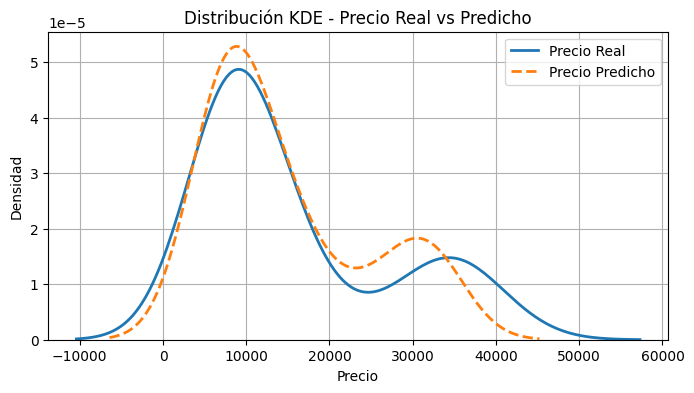

In [9]:
# Comparación visual de distribuciones
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred_tree, label='Precio Predicho', linewidth=2, linestyle='--')

plt.title('Distribución KDE - Precio Real vs Predicho')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()